In [4]:

import os
import vtk
import numpy as np
import matplotlib.pyplot as plt
from vtk.util.numpy_support import vtk_to_numpy
import os

In [17]:

def vtk_to_vector(pd):

    n_points = pd.GetNumberOfPoints()

    vec = np.zeros(n_points * 3)

    for i in range(n_points):

        p = pd.GetPoint(i)

        vec[i*3] = p[0]

        vec[i*3+1] = p[1]

        vec[i*3+2] = p[2]

    return vec

 

def read_and_extract_coordinates(file_path):

    # Read the .vtk file

    reader = vtk.vtkPolyDataReader()

    reader.SetFileName(file_path)

    reader.Update()

 

    # Get the polydata object

    polydata = reader.GetOutput()

 

    # Convert the polydata to a NumPy vector

    vector = vtk_to_vector(polydata)

 

    # Extract x, y, and z coordinates separately

    x_coords = vector[0::3]  # Start at index 0, take every 3rd element

    y_coords = vector[1::3]  # Start at index 1, take every 3rd element

    z_coords = vector[2::3]  # Start at index 2, take every 3rd element

    return x_coords, y_coords, z_coords



In [11]:
# Read the .vtk file

folder = "/Users/aoi/Desktop/Working_Space/data/vertibra/challenge_data/train/surfaces/"

In [35]:
counter = 0
for file in os.listdir(folder):
    if "surface.vtk" in file:
        x,y,z = read_and_extract_coordinates(os.path.join(folder,file))
        if counter == 0:
            x_all,y_all,z_all = x,y,z
            counter += 1
        else:
            x_all = np.row_stack([x_all,x])
            y_all = np.row_stack([y_all,y])
            z_all = np.row_stack([z_all,z])
            counter +=1

print(counter)
                                



/var/folders/fg/0vkn43r56nd5hn2b9yq3m_qh0000gn/T/ipykernel_4513/1188757757.py:9: DeprecationWarning: `row_stack` alias is deprecated. Use `np.vstack` directly.
  x_all = np.row_stack([x_all,x])
/var/folders/fg/0vkn43r56nd5hn2b9yq3m_qh0000gn/T/ipykernel_4513/1188757757.py:10: DeprecationWarning: `row_stack` alias is deprecated. Use `np.vstack` directly.
  y_all = np.row_stack([y_all,y])
/var/folders/fg/0vkn43r56nd5hn2b9yq3m_qh0000gn/T/ipykernel_4513/1188757757.py:11: DeprecationWarning: `row_stack` alias is deprecated. Use `np.vstack` directly.
  z_all = np.row_stack([z_all,z])


546


In [57]:
mu_x,std_x = x_all.mean(axis = 0), x_all.std(axis = 0)
mu_y,std_y = y_all.mean(axis = 0), y_all.std(axis = 0)
mu_z,std_z = z_all.mean(axis = 0), z_all.std(axis = 0)

In [59]:
counter = 0
for file in os.listdir(folder):
    if "surface.vtk" not in file:
        x,y,z = read_and_extract_coordinates(os.path.join(folder,file))
        if counter == 0:
            x_all_bad,y_all_bad,z_all_bad = x,y,z
            counter += 1
        else:
            x_all_bad = np.row_stack([x_all_bad,x])
            y_all_bad = np.row_stack([y_all_bad,y])
            z_all_bad = np.row_stack([z_all_bad,z])
            counter +=1

print(counter)

/var/folders/fg/0vkn43r56nd5hn2b9yq3m_qh0000gn/T/ipykernel_4513/1148291070.py:9: DeprecationWarning: `row_stack` alias is deprecated. Use `np.vstack` directly.
  x_all_bad = np.row_stack([x_all_bad,x])
/var/folders/fg/0vkn43r56nd5hn2b9yq3m_qh0000gn/T/ipykernel_4513/1148291070.py:10: DeprecationWarning: `row_stack` alias is deprecated. Use `np.vstack` directly.
  y_all_bad = np.row_stack([y_all_bad,y])
/var/folders/fg/0vkn43r56nd5hn2b9yq3m_qh0000gn/T/ipykernel_4513/1148291070.py:11: DeprecationWarning: `row_stack` alias is deprecated. Use `np.vstack` directly.
  z_all_bad = np.row_stack([z_all_bad,z])


KeyboardInterrupt: 

In [71]:
from scipy.stats import norm
xcritical = 73.06
mean = 72
stdev = 0.5

x_bad,y_bad,z_bad = x_all_bad[0],y_all_bad[0],z_all_bad[0]


(85974,)


(85974,)

In [86]:
results = np.zeros((len(mu_x),len(x_bad[:1000])))

results.shape

(85974, 1000)

In [88]:
from tqdm import tqdm
import multiprocessing
import functools


def calc_pvals(xcritical,ycritical,zcritical,mx,my,mz,sx,sy,sz,results):
    px = norm.cdf(x=xcritical,loc=mx,scale=sx)
    py = norm.cdf(x=ycritical,loc=my,scale=sy)
    pz = norm.cdf(x=zcritical,loc=mz,scale=sz)
    zx = norm.ppf(px)
    zy = norm.ppf(py)
    zz = norm.ppf(pz)
    if zx < 2 and zx > -2:
        results[n,f]  = 1
    else:
        results[n,f] = 0
    return results
# generate image encoding using multiple threads
with multiprocessing.Pool(processes=os.cpu_count() - 1) as pool:
    encoding_list = pool.map(functools.partial(calc_pvals), LIST_OF_FUNCTION_ARGS)


for n,(mx,sx,my,sy,mz,sz) in tqdm(enumerate(zip(mu_x,std_x,mu_y,std_y,mu_z,std_z))):
    for f,(xcritical,ycritical,zcritical) in enumerate(zip(x_bad[:1000],y_bad[:1000],z_bad[:1000])):
        
        px = norm.cdf(x=xcritical,loc=mx,scale=sx)
        py = norm.cdf(x=ycritical,loc=my,scale=sy)
        pz = norm.cdf(x=zcritical,loc=mz,scale=sz)
        zx = norm.ppf(px)
        zy = norm.ppf(py)
        zz = norm.ppf(pz)
        if zx < 2 and zx > -2:
            results[n,f]  = 1
        else:
            results[n,f] = 0


4299it [19:02,  3.76it/s]


KeyboardInterrupt: 

In [85]:
results.shape

(1, 85974, 1000)

In [25]:
np.shape(np.stack((x,x),axis = 1))

(85974, 2)

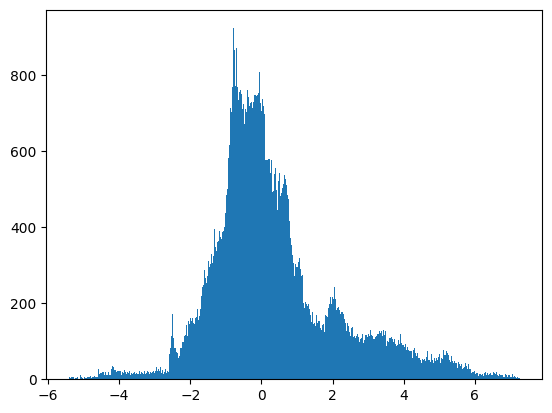

In [77]:
plt.hist(zs,bins = 1000)
plt.show()